In [1]:
import datetime as dt
import pandas as pd

# Exchange_Rate

In [3]:
Exchange_Rate = pd.read_csv("Exchange_Rates.csv")

In [4]:
Exchange_Rate

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415
...,...,...,...
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238


In [5]:
# Check for missing values
Exchange_Rate.isnull().sum()

Date        0
Currency    0
Exchange    0
dtype: int64

In [6]:
# Summary statistics
Exchange_Rate.describe()

,Exchange
count,11215.000000
mean,1.061682
std,0.245519
min,0.628500
25%,0.857800
50%,1.000000
75%,1.311900
max,1.725300


In [7]:
# Check data types
Exchange_Rate.dtypes

Date         object
Currency     object
Exchange    float64
dtype: object

In [8]:
# Convert 'Date' column to datetime objects
Exchange_Rate['Date'] = pd.to_datetime(Exchange_Rate['Date'])

In [13]:
Exchange_Rate.dtypes

Date        datetime64[ns]
Currency            object
Exchange           float64
dtype: object

In [18]:
Exchange_Rate.duplicated().sum()

0

In [20]:
Exchange_Rate.to_csv("New_Exchange_Rate.csv",index=False)

# Sales

In [23]:
Sales = pd.read_csv("Sales.csv")

In [25]:
Sales

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [27]:
Sales.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [29]:
# change the Delivery date column values NaN = In_Store
Sales['Delivery Date'] = Sales['Delivery Date'].fillna('In_Store')
Sales

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,In_Store,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,In_Store,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [31]:
import numpy as np

# Convert specific date format values to 'Online' for records that look like MM/DD/YYYY
Sales['Delivery Date'] = Sales['Delivery Date'].apply(lambda x: 'Online' if pd.notnull(x) and x.count('/') == 2 and x.replace('/', '').isdigit() else x)

print(Sales)

       Order Number  Line Item Order Date Delivery Date  CustomerKey  \
0            366000          1   1/1/2016      In_Store       265598   
1            366001          1   1/1/2016        Online      1269051   
2            366001          2   1/1/2016        Online      1269051   
3            366002          1   1/1/2016        Online       266019   
4            366002          2   1/1/2016        Online       266019   
...             ...        ...        ...           ...          ...   
62879       2243030          1  2/20/2021      In_Store      1216913   
62880       2243031          1  2/20/2021        Online       511229   
62881       2243032          1  2/20/2021        Online       331277   
62882       2243032          2  2/20/2021        Online       331277   
62883       2243032          3  2/20/2021        Online       331277   

       StoreKey  ProductKey  Quantity Currency Code  
0            10        1304         1           CAD  
1             0        1048

In [33]:
# Convert 'Order Date' column to datetime objects
Sales['Order Date'] = pd.to_datetime(Sales['Order Date'])

In [35]:
Sales['Delivery Date'].unique()

array(['In_Store', 'Online'], dtype=object)

In [37]:
Sales.duplicated().sum()

0

In [39]:
Sales.dtypes

Order Number              int64
Line Item                 int64
Order Date       datetime64[ns]
Delivery Date            object
CustomerKey               int64
StoreKey                  int64
ProductKey                int64
Quantity                  int64
Currency Code            object
dtype: object

In [41]:
Sales.to_csv("New_Sales.csv", index=False)

# Customer

In [44]:
Customer = pd.read_csv("Customers.csv", encoding = 'Windows-1252')

In [46]:
Customer

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Dušková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


In [48]:
Customer.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [50]:
#Droping the useless columns
Customer.drop(["State Code","Zip Code"],axis=1,inplace=True)

In [52]:
# Convert Birthday column to correct date format
Customer['Birthday'] = pd.to_datetime(Customer['Birthday'], format = '%m/%d/%Y')
Customer

,CustomerKey,Gender,Name,City,State,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,South Australia,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,Victoria,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,South Australia,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,Victoria,Australia,Australia,1965-11-19
...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Dušková,Houston,Texas,United States,North America,1936-03-25
15262,2099618,Male,Justin Solórzano,Mclean,Virginia,United States,North America,1992-02-16
15263,2099758,Male,Svend Petrussen,Wilmington,North Carolina,United States,North America,1937-11-09
15264,2099862,Female,Lorenza Rush,Riverside,California,United States,North America,1937-10-12


In [54]:
#checking null set and data types
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerKey  15266 non-null  int64         
 1   Gender       15266 non-null  object        
 2   Name         15266 non-null  object        
 3   City         15266 non-null  object        
 4   State        15266 non-null  object        
 5   Country      15266 non-null  object        
 6   Continent    15266 non-null  object        
 7   Birthday     15266 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 954.3+ KB


In [56]:
#save cleaned dataset into new csv
Customer.to_csv("New_Customer.csv", index=False)

# Products

In [59]:
Products = pd.read_csv("Products.csv")

In [61]:
Products

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [63]:
Products.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [65]:
Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [67]:
# Data Type Conversion
# Convert columns to the appropriate data types if needed
# Example: Convert 'Unit Cost USD' and 'Unit Price USD' to numeric type
Products['Unit Cost USD'] = Products['Unit Cost USD'].str.replace('$', '').str.replace(",", "").str.strip().astype(float)
Products['Unit Price USD'] = Products['Unit Price USD'].str.replace('$', '').str.replace(",", "").str.strip().astype(float)
     

In [69]:
Products.dtypes

ProductKey          int64
Product Name       object
Brand              object
Color              object
Unit Cost USD     float64
Unit Price USD    float64
SubcategoryKey      int64
Subcategory        object
CategoryKey         int64
Category           object
dtype: object

In [71]:
Products.drop(["SubcategoryKey"],axis=1,inplace=True)

In [73]:
Products.duplicated().sum()

0

In [75]:
#save cleaned dataset into new csv
Products.to_csv("New_Products.csv", index=False)

# Stores

In [78]:
Stores = pd.read_csv("Stores.csv")

In [80]:
Stores

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [82]:
# Convert 'Open Date' to datetime objects
Stores['Open Date'] = pd.to_datetime(Stores['Open Date'])
     

Stores.fillna(0)

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09
...,...,...,...,...,...
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01


In [84]:
Stores.duplicated().sum()

0

In [86]:
Stores.to_csv("New_Stores.csv",index=False)

# Exploratory Data Analysis (Visualization)

In [142]:
import pandas as pd

In [144]:
Exchange_rate = pd.read_csv("New_Exchange_rate.csv")
Stores = pd.read_csv("New_Stores.csv")
Sales = pd.read_csv("New_Sales.csv")
Products = pd.read_csv("New_Products.csv")
Customer= pd.read_csv("New_Customer.csv")

In [145]:
#Import module
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import date
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

### What type of products does the company sell?

In [149]:
# find unique value of catgory column output in list shape
Products['Category'].unique()

array(['Audio', 'TV and Video', 'Computers', 'Cameras and camcorders',
       'Cell phones', 'Music, Movies and Audio Books', 'Games and Toys',
       'Home Appliances'], dtype=object)

<Axes: ylabel='count'>

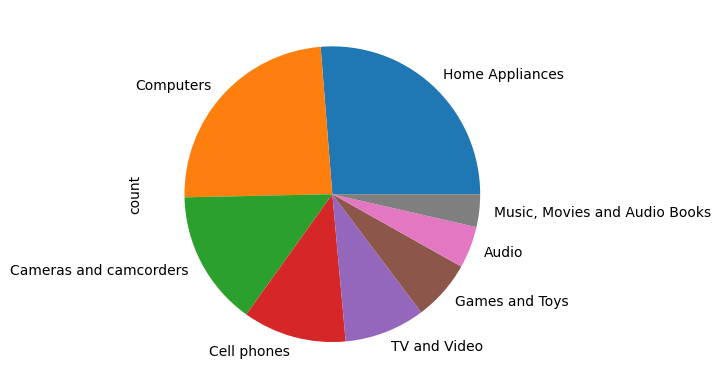

In [151]:
#Make visulization
Products['Category'].value_counts().plot(kind='pie')

### Where are the customers located?

In [154]:
# Customer Locations
Customer['Country'].value_counts()

Country
United States     6828
United Kingdom    1944
Canada            1553
Germany           1473
Australia         1420
Netherlands        733
France             670
Italy              645
Name: count, dtype: int64

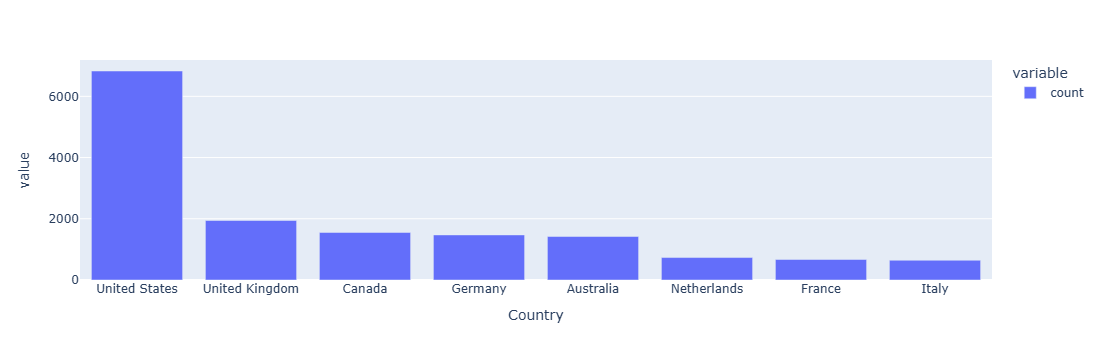

In [156]:
#Make a bar plot with plotly countries value counts
import plotly.express as px
fig = px.bar(Customer['Country'].value_counts())
fig.show()


<Axes: xlabel='Country'>

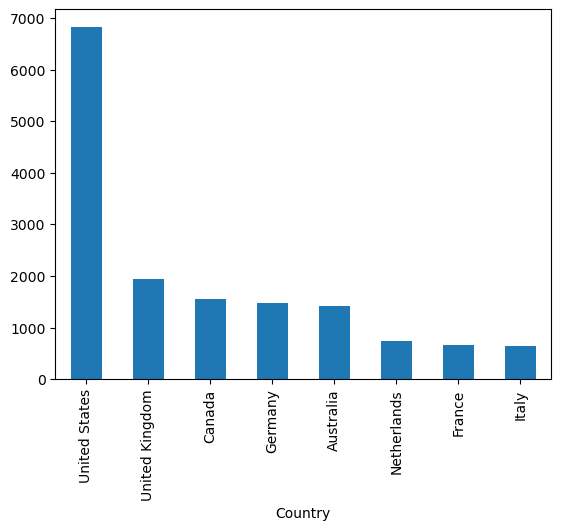

In [157]:
# make a bar plolt
Customer['Country'].value_counts().plot(kind='bar')

In [159]:
# Merge customers and Sales
merged_df = pd.merge(Customer, Sales, on='CustomerKey', how='inner')
print("After merging Customer and Sales:", merged_df.shape)

After merging Customer and Sales: (62884, 16)


In [160]:
merged_df

,CustomerKey,Gender,Name,City,State,Country,Continent,Birthday,Order Number,Line Item,Order Date,Delivery Date,StoreKey,ProductKey,Quantity,Currency Code
0,301,Female,Lilly Harding,WANDEARAH EAST,South Australia,Australia,Australia,1939-07-03,1776007,1,2019-11-11,Online,0,53,2,AUD
1,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27,1109001,1,2018-01-13,In_Store,6,443,4,AUD
2,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27,1109001,2,2018-01-13,In_Store,6,656,4,AUD
3,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27,1109001,3,2018-01-13,In_Store,6,1084,3,AUD
4,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27,1781006,1,2019-11-16,In_Store,6,418,3,AUD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2099937,Male,Zygmunt Kaminski,Bloomfield Township,Michigan,United States,North America,1965-08-18,1269016,2,2018-06-22,In_Store,56,425,5,USD
62880,2099937,Male,Zygmunt Kaminski,Bloomfield Township,Michigan,United States,North America,1965-08-18,1269016,3,2018-06-22,In_Store,56,344,7,USD
62881,2099937,Male,Zygmunt Kaminski,Bloomfield Township,Michigan,United States,North America,1965-08-18,1269016,4,2018-06-22,In_Store,56,1162,1,USD
62882,2099937,Male,Zygmunt Kaminski,Bloomfield Township,Michigan,United States,North America,1965-08-18,1872055,1,2020-02-15,In_Store,53,434,10,USD


In [164]:
# Merge with Products
if not merged_df.empty:
    merged_df = pd.merge(merged_df, Products, on='ProductKey', how='inner')
    print("After merging with Products:", merged_df.shape)

After merging with Products: (62884, 24)


In [166]:
merged_df['Delivery Date']

0          Online
1        In_Store
2        In_Store
3        In_Store
4        In_Store
           ...   
62879    In_Store
62880    In_Store
62881    In_Store
62882    In_Store
62883    In_Store
Name: Delivery Date, Length: 62884, dtype: object

In [168]:
merged_df

,CustomerKey,Gender,Name,City,State,Country,Continent,Birthday,Order Number,Line Item,...,Quantity,Currency Code,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,Subcategory,CategoryKey,Category
0,301,Female,Lilly Harding,WANDEARAH EAST,South Australia,Australia,Australia,1939-07-03,1776007,1,...,2,AUD,WWI 4GB Video Recording Pen X200 Black,Wide World Importers,Black,98.07,296.00,Recording Pen,1,Audio
1,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27,1109001,1,...,4,AUD,WWI Desktop PC3.0 M0300 Silver,Wide World Importers,Silver,160.49,349.00,Desktops,3,Computers
2,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27,1109001,2,...,4,AUD,"Proseware Desk Jet All-in-One Printer, Scanner...",Proseware,Black,72.66,158.00,"Printers, Scanners & Fax",3,Computers
3,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27,1109001,3,...,3,AUD,Contoso SLR Camera X143 Grey,Contoso,Grey,214.03,646.00,Digital SLR Cameras,4,Cameras and camcorders
4,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27,1781006,1,...,3,AUD,Adventure Works Desktop PC1.60 ED160 Silver,Adventure Works,Silver,137.63,269.95,Desktops,3,Computers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2099937,Male,Zygmunt Kaminski,Bloomfield Township,Michigan,United States,North America,1965-08-18,1269016,2,...,5,USD,Adventure Works Desktop PC1.80 ED180 Black,Adventure Works,Black,188.13,369.00,Desktops,3,Computers
62880,2099937,Male,Zygmunt Kaminski,Bloomfield Township,Michigan,United States,North America,1965-08-18,1269016,3,...,7,USD,Fabrikam Laptop12 M2000 White,Fabrikam,White,186.60,366.00,Laptops,3,Computers
62881,2099937,Male,Zygmunt Kaminski,Bloomfield Township,Michigan,United States,North America,1965-08-18,1269016,4,...,1,USD,Fabrikam Business Videographer 1/3'' 8.5mm M38...,Fabrikam,Black,395.48,860.00,Camcorders,4,Cameras and camcorders
62882,2099937,Male,Zygmunt Kaminski,Bloomfield Township,Michigan,United States,North America,1965-08-18,1872055,1,...,10,USD,Adventure Works Desktop PC2.30 MD230 White,Adventure Works,White,275.46,599.00,Desktops,3,Computers


In [170]:
# Merge with stores
if not merged_df.empty:
    merged_df = pd.merge(merged_df, Stores, on='StoreKey', how='inner')
    print("After merging with Stores:", merged_df.shape)

After merging with Stores: (62884, 28)


In [172]:
merged_df['Delivery Date']

0          Online
1        In_Store
2        In_Store
3        In_Store
4        In_Store
           ...   
62879    In_Store
62880    In_Store
62881    In_Store
62882    In_Store
62883    In_Store
Name: Delivery Date, Length: 62884, dtype: object

In [174]:
merged_df

,CustomerKey,Gender,Name,City,State_x,Country_x,Continent,Birthday,Order Number,Line Item,...,Color,Unit Cost USD,Unit Price USD,Subcategory,CategoryKey,Category,Country_y,State_y,Square Meters,Open Date
0,301,Female,Lilly Harding,WANDEARAH EAST,South Australia,Australia,Australia,1939-07-03,1776007,1,...,Black,98.07,296.00,Recording Pen,1,Audio,Online,Online,NaN,2010-01-01
1,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27,1109001,1,...,Silver,160.49,349.00,Desktops,3,Computers,Australia,Western Australia,2000.0,2010-01-01
2,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27,1109001,2,...,Black,72.66,158.00,"Printers, Scanners & Fax",3,Computers,Australia,Western Australia,2000.0,2010-01-01
3,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27,1109001,3,...,Grey,214.03,646.00,Digital SLR Cameras,4,Cameras and camcorders,Australia,Western Australia,2000.0,2010-01-01
4,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27,1781006,1,...,Silver,137.63,269.95,Desktops,3,Computers,Australia,Western Australia,2000.0,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2099937,Male,Zygmunt Kaminski,Bloomfield Township,Michigan,United States,North America,1965-08-18,1269016,2,...,Black,188.13,369.00,Desktops,3,Computers,United States,New Hampshire,1260.0,2015-01-01
62880,2099937,Male,Zygmunt Kaminski,Bloomfield Township,Michigan,United States,North America,1965-08-18,1269016,3,...,White,186.60,366.00,Laptops,3,Computers,United States,New Hampshire,1260.0,2015-01-01
62881,2099937,Male,Zygmunt Kaminski,Bloomfield Township,Michigan,United States,North America,1965-08-18,1269016,4,...,Black,395.48,860.00,Camcorders,4,Cameras and camcorders,United States,New Hampshire,1260.0,2015-01-01
62882,2099937,Male,Zygmunt Kaminski,Bloomfield Township,Michigan,United States,North America,1965-08-18,1872055,1,...,White,275.46,599.00,Desktops,3,Computers,United States,Montana,1260.0,2012-06-06


In [176]:
order_date_column = merged_df['Order Date']
order_date_column

0        2019-11-11
1        2018-01-13
2        2018-01-13
3        2018-01-13
4        2019-11-16
            ...    
62879    2018-06-22
62880    2018-06-22
62881    2018-06-22
62882    2020-02-15
62883    2020-02-15
Name: Order Date, Length: 62884, dtype: object

In [178]:
merged_df.head

<bound method NDFrame.head of        CustomerKey  Gender              Name                 City  \
0              301  Female     Lilly Harding       WANDEARAH EAST   
1              325  Female      Madison Hull           MOUNT BUDD   
2              325  Female      Madison Hull           MOUNT BUDD   
3              325  Female      Madison Hull           MOUNT BUDD   
4              325  Female      Madison Hull           MOUNT BUDD   
...            ...     ...               ...                  ...   
62879      2099937    Male  Zygmunt Kaminski  Bloomfield Township   
62880      2099937    Male  Zygmunt Kaminski  Bloomfield Township   
62881      2099937    Male  Zygmunt Kaminski  Bloomfield Township   
62882      2099937    Male  Zygmunt Kaminski  Bloomfield Township   
62883      2099937    Male  Zygmunt Kaminski  Bloomfield Township   

                 State_x      Country_x      Continent    Birthday  \
0        South Australia      Australia      Australia  1939-07-03   
1

In [180]:
 Exchange_rate

,Date,Currency,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415
...,...,...,...
11210,2021-02-20,USD,1.0000
11211,2021-02-20,CAD,1.2610
11212,2021-02-20,AUD,1.2723
11213,2021-02-20,EUR,0.8238


In [182]:
Exchange_rate_pivot = Exchange_rate.pivot_table(index='Date', columns='Currency', values='Exchange').reset_index()
#merged_df = pd.merge(merged_df, Exchange_rate_pivot, left_on='Order Date', right_on='Date', how='left')
Exchange_rate_pivot

Currency,Date,AUD,CAD,EUR,GBP,USD
0,2015-01-01,1.2214,1.1583,0.8237,0.6415,1.0
1,2015-01-02,1.2323,1.1682,0.8304,0.6477,1.0
2,2015-01-03,1.2323,1.1682,0.8304,0.6477,1.0
3,2015-01-04,1.2323,1.1682,0.8304,0.6477,1.0
4,2015-01-05,1.2384,1.1784,0.8393,0.6569,1.0
...,...,...,...,...,...,...
2238,2021-02-16,1.2858,1.2653,0.8235,0.7192,1.0
2239,2021-02-17,1.2913,1.2690,0.8292,0.7211,1.0
2240,2021-02-18,1.2842,1.2667,0.8275,0.7162,1.0
2241,2021-02-19,1.2723,1.2610,0.8238,0.7126,1.0


In [184]:
Exchange_rate.columns

Index(['Date', 'Currency', 'Exchange'], dtype='object')

In [186]:
merged_df = pd.merge(merged_df, Exchange_rate_pivot, left_on='Order Date', right_on='Date', how='left')
print("After merging with Exchange_rate_pivot:", merged_df.shape)

After merging with Exchange_rate_pivot: (62884, 34)


In [188]:
merged_df['Delivery Date']

0          Online
1        In_Store
2        In_Store
3        In_Store
4        In_Store
           ...   
62879    In_Store
62880    In_Store
62881    In_Store
62882    In_Store
62883    In_Store
Name: Delivery Date, Length: 62884, dtype: object

In [190]:
merged_df.columns

Index(['CustomerKey', 'Gender', 'Name', 'City', 'State_x', 'Country_x',
       'Continent', 'Birthday', 'Order Number', 'Line Item', 'Order Date',
       'Delivery Date', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'Product Name', 'Brand', 'Color', 'Unit Cost USD', 'Unit Price USD',
       'Subcategory', 'CategoryKey', 'Category', 'Country_y', 'State_y',
       'Square Meters', 'Open Date', 'Date', 'AUD', 'CAD', 'EUR', 'GBP',
       'USD'],
      dtype='object')

In [192]:
merged_df.drop(columns=['State_y', 'Country_y', 'Date','AUD', 'CAD', 'EUR', 'GBP', 'USD'], inplace=True)

In [194]:
merged_df.rename(columns={'State_x': 'State', 'Country_x': 'Country'}, inplace=True)

In [196]:
merged_df.columns

Index(['CustomerKey', 'Gender', 'Name', 'City', 'State', 'Country',
       'Continent', 'Birthday', 'Order Number', 'Line Item', 'Order Date',
       'Delivery Date', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'Product Name', 'Brand', 'Color', 'Unit Cost USD', 'Unit Price USD',
       'Subcategory', 'CategoryKey', 'Category', 'Square Meters', 'Open Date'],
      dtype='object')

In [198]:
merged_df.to_csv("merged_dsp.csv", index = False)

In [199]:
df = pd.read_csv("merged_dsp.csv")

In [201]:
df.shape  # Drop null values

(62884, 26)

In [204]:
df.isnull().sum()

CustomerKey           0
Gender                0
Name                  0
City                  0
State                 0
Country               0
Continent             0
Birthday              0
Order Number          0
Line Item             0
Order Date            0
Delivery Date         0
StoreKey              0
ProductKey            0
Quantity              0
Currency Code         0
Product Name          0
Brand                 0
Color                 0
Unit Cost USD         0
Unit Price USD        0
Subcategory           0
CategoryKey           0
Category              0
Square Meters     13165
Open Date             0
dtype: int64

In [206]:
df['Square Meters'] = df['Square Meters'].fillna(0)

In [208]:
df.isnull().sum()

CustomerKey       0
Gender            0
Name              0
City              0
State             0
Country           0
Continent         0
Birthday          0
Order Number      0
Line Item         0
Order Date        0
Delivery Date     0
StoreKey          0
ProductKey        0
Quantity          0
Currency Code     0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
Subcategory       0
CategoryKey       0
Category          0
Square Meters     0
Open Date         0
dtype: int64

In [210]:
df.dtypes

CustomerKey         int64
Gender             object
Name               object
City               object
State              object
Country            object
Continent          object
Birthday           object
Order Number        int64
Line Item           int64
Order Date         object
Delivery Date      object
StoreKey            int64
ProductKey          int64
Quantity            int64
Currency Code      object
Product Name       object
Brand              object
Color              object
Unit Cost USD     float64
Unit Price USD    float64
Subcategory        object
CategoryKey         int64
Category           object
Square Meters     float64
Open Date          object
dtype: object

In [214]:
df.dtypes

CustomerKey         int64
Gender             object
Name               object
City               object
State              object
Country            object
Continent          object
Birthday           object
Order Number        int64
Line Item           int64
Order Date         object
Delivery Date      object
StoreKey            int64
ProductKey          int64
Quantity            int64
Currency Code      object
Product Name       object
Brand              object
Color              object
Unit Cost USD     float64
Unit Price USD    float64
Subcategory        object
CategoryKey         int64
Category           object
Square Meters     float64
Open Date          object
dtype: object

In [216]:
!pip3 install mysql-connector-python

In [229]:
import mysql.connector
import pandas as pd

In [231]:
#SQL connection
mydb=mysql.connector.connect(host="localhost",
user="root",
password="",
database="DSP_MERGED")
my_cursor = mydb.cursor()

In [224]:
# Replace data types from pandas to MySQL
a = ",".join(f"`{i}` {j}" for i, j in zip(df.columns, df.dtypes)).replace("float64", "FLOAT").replace("object", "TEXT").replace("int64", "INT")
# Use a valid table name
table_name = "Data_Spark"

# Create the table
create_table_query = f"CREATE TABLE `{table_name}` ({a})"
with mydb.cursor() as cursor:
    my_cursor.execute(create_table_query)

# Insert data into the table
for i in range(len(df)):
    insert_query = f"INSERT INTO `{table_name}` VALUES {tuple(df.iloc[i])}"
    with mydb.cursor() as cursor:
        my_cursor.execute(insert_query)
    mydb.commit()

mydb.close()

## 1. Demographic Distribution:  Customers by Gender and Country

In [236]:
my_cursor.execute("""SELECT Gender, Country, COUNT(CustomerKey) AS CustomerCount
FROM Data_Spark
GROUP BY Gender, Country
ORDER BY CustomerCount DESC;""")



out=my_cursor.fetchall()
from tabulate import tabulate
print(tabulate(out,headers=[i[0] for i in my_cursor.description],  tablefmt='psql'))
mydb.commit()

+----------+----------------+-----------------+
| Gender   | Country        |   CustomerCount |
|----------+----------------+-----------------|
| Male     | United States  |           17340 |
| Female   | United States  |           16427 |
| Male     | United Kingdom |            4116 |
| Female   | United Kingdom |            4024 |
| Female   | Germany        |            3084 |
| Male     | Germany        |            2872 |
| Male     | Canada         |            2720 |
| Female   | Canada         |            2695 |
| Female   | Australia      |            1553 |
| Male     | Italy          |            1391 |
| Male     | Australia      |            1388 |
| Female   | Italy          |            1294 |
| Male     | Netherlands    |            1173 |
| Female   | Netherlands    |            1077 |
| Female   | France         |             926 |
| Male     | France         |             804 |
+----------+----------------+-----------------+


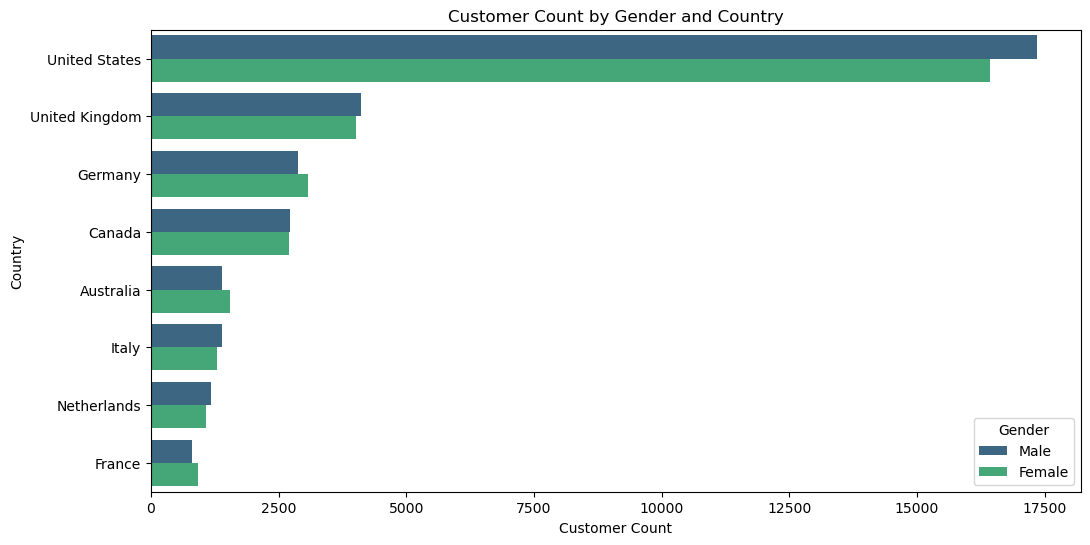

+----------+----------------+-----------------+
| Gender   | Country        |   CustomerCount |
|----------+----------------+-----------------|
| Male     | United States  |           17340 |
| Female   | United States  |           16427 |
| Male     | United Kingdom |            4116 |
| Female   | United Kingdom |            4024 |
| Female   | Germany        |            3084 |
| Male     | Germany        |            2872 |
| Male     | Canada         |            2720 |
| Female   | Canada         |            2695 |
| Female   | Australia      |            1553 |
| Male     | Italy          |            1391 |
| Male     | Australia      |            1388 |
| Female   | Italy          |            1294 |
| Male     | Netherlands    |            1173 |
| Female   | Netherlands    |            1077 |
| Female   | France         |             926 |
| Male     | France         |             804 |
+----------+----------------+-----------------+


In [238]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.DataFrame(out, columns=[i[0] for i in my_cursor.description])

# Create the plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='CustomerCount', y='Country', hue='Gender', data=df, palette='viridis') # Use a colorful palette
plt.title('Customer Count by Gender and Country')
plt.xlabel('Customer Count')
plt.ylabel('Country')
plt.show()

# Print the table with colorful formatting using tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))

## 2. Demographic Distribution: Age Group Distribution by Country

In [241]:
my_cursor.execute("""SELECT Country, 
       CASE 
           WHEN YEAR(CURDATE()) - YEAR(Birthday) < 25 THEN 'Under 25'
           WHEN YEAR(CURDATE()) - YEAR(Birthday) BETWEEN 25 AND 35 THEN '25-35'
           WHEN YEAR(CURDATE()) - YEAR(Birthday) BETWEEN 36 AND 50 THEN '36-50'
           ELSE 'Above 50'
       END AS AgeGroup,
       COUNT(CustomerKey) AS CustomerCount
FROM Data_Spark
WHERE Birthday IS NOT NULL
GROUP BY Country, AgeGroup
ORDER BY CustomerCount DESC;
""")



out=my_cursor.fetchall()
from tabulate import tabulate
print(tabulate(out,headers=[i[0] for i in my_cursor.description],  tablefmt='psql'))
mydb.commit()

+----------------+------------+-----------------+
| Country        | AgeGroup   |   CustomerCount |
|----------------+------------+-----------------|
| United States  | Above 50   |           19757 |
| United States  | 36-50      |            7378 |
| United States  | 25-35      |            5418 |
| United Kingdom | Above 50   |            4432 |
| Germany        | Above 50   |            3491 |
| Canada         | Above 50   |            3002 |
| United Kingdom | 36-50      |            1757 |
| Australia      | Above 50   |            1753 |
| United Kingdom | 25-35      |            1638 |
| Italy          | Above 50   |            1543 |
| Germany        | 36-50      |            1353 |
| Canada         | 36-50      |            1275 |
| Netherlands    | Above 50   |            1274 |
| United States  | Under 25   |            1214 |
| France         | Above 50   |            1023 |
| Germany        | 25-35      |             902 |
| Canada         | 25-35      |             870 |


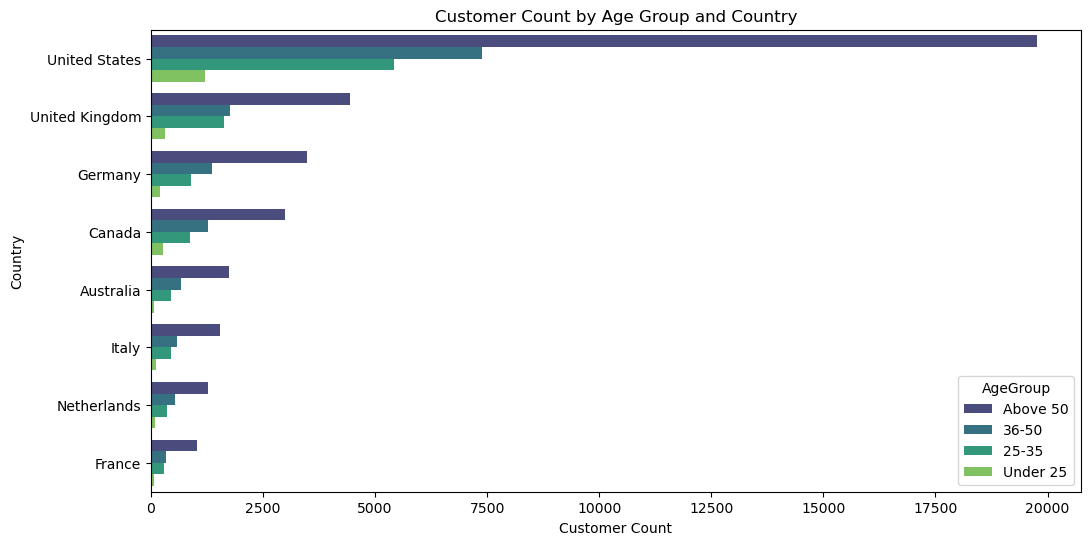

In [243]:
df = pd.DataFrame(out, columns=[i[0] for i in my_cursor.description])

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='CustomerCount', y='Country', hue='AgeGroup', data=df, palette='viridis')
plt.title('Customer Count by Age Group and Country')
plt.xlabel('Customer Count')
plt.ylabel('Country')
plt.show()

In [245]:
df.shape

(32, 3)

## 3. Customer Distribution by City and Country

In [262]:
my_cursor.execute("""SELECT 
    City, Country,
    COUNT(CustomerKey) AS CustomerCount
FROM 
    data_spark
GROUP BY 
    City, Country
ORDER BY 
    CustomerCount DESC ;
""")



out=my_cursor.fetchall()
from tabulate import tabulate
print(tabulate(out,headers=[i[0] for i in my_cursor.description],  tablefmt='psql'))
mydb.commit()

+--------------------------------------+----------------+-----------------+
| City                                 | Country        |   CustomerCount |
|--------------------------------------+----------------+-----------------|
| Toronto                              | Canada         |             681 |
| Los Angeles                          | United States  |             579 |
| New York                             | United States  |             569 |
| Houston                              | United States  |             438 |
| Chicago                              | United States  |             385 |
| Philadelphia                         | United States  |             382 |
| Montreal                             | Canada         |             361 |
| Dallas                               | United States  |             289 |
| Calgary                              | Canada         |             267 |
| Atlanta                              | United States  |             248 |
| Southfield

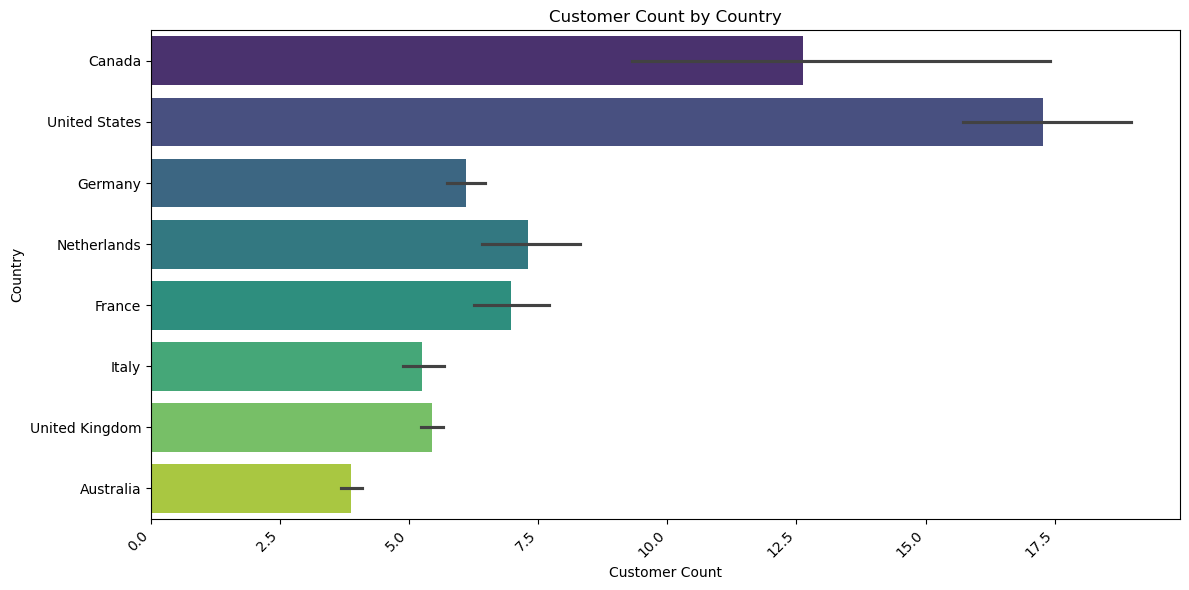

In [264]:
df = pd.DataFrame(out, columns=[i[0] for i in my_cursor.description])

# Assuming 'CustomerCount', 'City', and 'Country' columns exist in your DataFrame
# Create the plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='CustomerCount', y='Country', data=df, palette='viridis')  # Use a colorful palette
plt.title('Customer Count by Country')
plt.xlabel('Customer Count')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [283]:
# Execute your query
my_cursor.execute("""SELECT 
    'In_Store' AS Purchase_Type,
    COUNT(*) AS Sales_Count
FROM 
    Data_Spark
WHERE 
    `Delivery Date` = 'In_Store'

UNION ALL

SELECT 
    'Online' AS Purchase_Type,
    COUNT(*) AS Sales_Count
FROM 
    Data_Spark
WHERE 
    `Delivery Date` = 'Online';


""")

out=my_cursor.fetchall()
from tabulate import tabulate
print(tabulate(out,headers=[i[0] for i in my_cursor.description],  tablefmt='psql'))
mydb.commit()

+-----------------+---------------+
| Purchase_Type   |   Sales_Count |
|-----------------+---------------|
| In_Store        |         49719 |
| Online          |         13165 |
+-----------------+---------------+


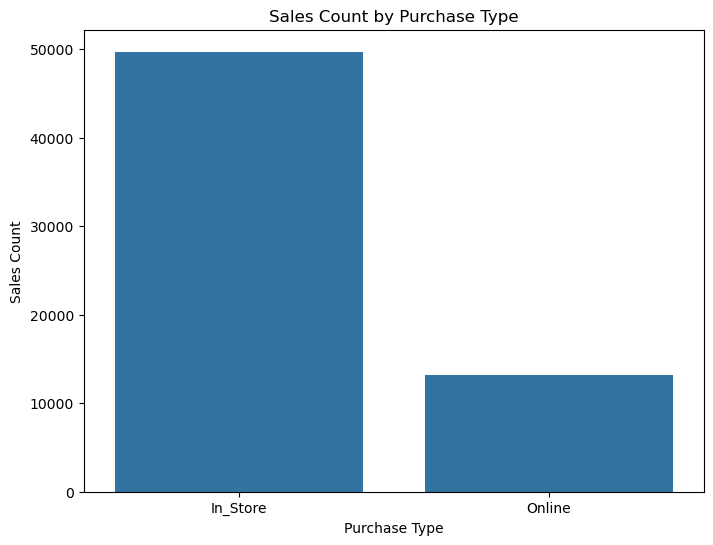

In [287]:
df = pd.DataFrame(out, columns=['Purchase_Type', 'Sales_Count'])

# Convert 'Sales_Count' to numeric type
df['Sales_Count'] = pd.to_numeric(df['Sales_Count'])

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Purchase_Type', y='Sales_Count', data=df)
plt.title('Sales Count by Purchase Type')
plt.xlabel('Purchase Type')
plt.ylabel('Sales Count')
plt.show()

## 4. Segmentation: Top 10 Product Categories Preferred by Female Customer

In [290]:
my_cursor.execute("""SELECT Subcategory, SUM(Quantity) AS TotalPurchased
FROM data_spark
WHERE Gender = 'Female'
GROUP BY Subcategory
ORDER BY TotalPurchased DESC
LIMIT 10;""")

out=my_cursor.fetchall()
from tabulate import tabulate
print(tabulate(out,headers=[i[0] for i in my_cursor.description],  tablefmt='psql'))
mydb.commit()

+----------------------+------------------+
| Subcategory          |   TotalPurchased |
|----------------------+------------------|
| Movie DVD            |            14580 |
| Desktops             |            10243 |
| Bluetooth Headphones |             6514 |
| Download Games       |             5617 |
| Boxed Games          |             5548 |
| Touch Screen Phones  |             5394 |
| Smart phones & PDAs  |             4813 |
| Recording Pen        |             3348 |
| Televisions          |             2740 |
| Home & Office Phones |             2658 |
+----------------------+------------------+


## 5. Segmentation: Top 10 Product Categories Preferred by male Customer

In [295]:
my_cursor.execute("""SELECT Subcategory, SUM(Quantity) AS TotalPurchased
FROM data_spark
WHERE Gender = 'Male'
GROUP BY Subcategory
ORDER BY TotalPurchased DESC
LIMIT 10;""")

out=my_cursor.fetchall()
out
from tabulate import tabulate
print(tabulate(out,headers=[i[0] for i in my_cursor.description],  tablefmt='psql'))
mydb.commit()

+----------------------+------------------+
| Subcategory          |   TotalPurchased |
|----------------------+------------------|
| Movie DVD            |            14222 |
| Desktops             |            10383 |
| Bluetooth Headphones |             7139 |
| Download Games       |             5930 |
| Boxed Games          |             5496 |
| Smart phones & PDAs  |             5264 |
| Touch Screen Phones  |             5236 |
| Recording Pen        |             3269 |
| Televisions          |             2885 |
| Home & Office Phones |             2774 |
+----------------------+------------------+


## 6. Overall Sales Performance Over Time(month)

In [302]:
my_cursor.execute("""SELECT 
    DATE_FORMAT(`Order Date`, '%Y-%m-%d') AS year,
    SUM(`Quantity` * `Unit Price USD`) AS total_sales
FROM 
    data_spark
GROUP BY 
    year
ORDER BY 
    year ;
""")

out=my_cursor.fetchall()
from tabulate import tabulate
print(tabulate(out,headers=[i[0] for i in my_cursor.description],  tablefmt='psql'))
mydb.commit()

+------------+---------------+
| year       |   total_sales |
|------------+---------------|
| 2016-01-01 |      37442.4  |
| 2016-01-02 |      91366.9  |
| 2016-01-03 |        362.64 |
| 2016-01-04 |       9524.94 |
| 2016-01-05 |      22996.4  |
| 2016-01-06 |      29784.7  |
| 2016-01-07 |      26174.7  |
| 2016-01-08 |      20914.4  |
| 2016-01-09 |      27043.5  |
| 2016-01-10 |       1065.94 |
| 2016-01-11 |       8996.89 |
| 2016-01-12 |      14594    |
| 2016-01-13 |      45235.9  |
| 2016-01-14 |      31142.1  |
| 2016-01-15 |      30736.4  |
| 2016-01-16 |      22571.2  |
| 2016-01-18 |       2775.59 |
| 2016-01-19 |      12369.4  |
| 2016-01-20 |      17122.5  |
| 2016-01-21 |      31462.7  |
| 2016-01-22 |      15426.3  |
| 2016-01-23 |      28075.2  |
| 2016-01-25 |       6872.34 |
| 2016-01-26 |       3060.46 |
| 2016-01-27 |      31270.6  |
| 2016-01-28 |      28683.7  |
| 2016-01-29 |      18658.1  |
| 2016-01-30 |      34188.8  |
| 2016-02-01 |      30457.9  |
| 2016-0

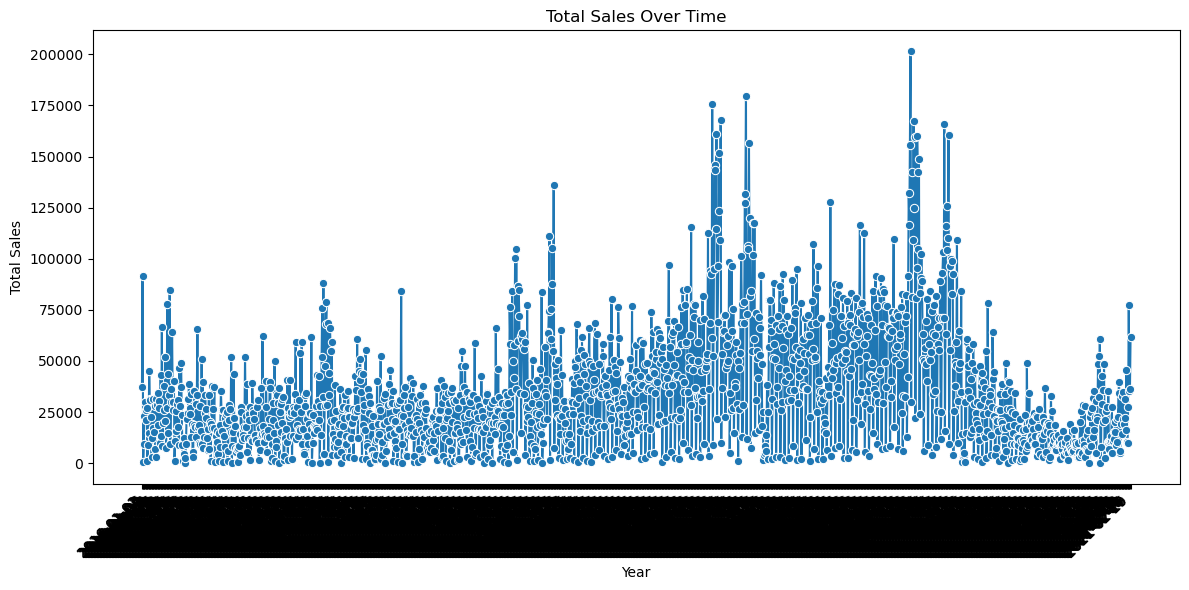

+------------+---------------+
| year       |   total_sales |
|------------+---------------|
| 2016-01-01 |      37442.4  |
| 2016-01-02 |      91366.9  |
| 2016-01-03 |        362.64 |
| 2016-01-04 |       9524.94 |
| 2016-01-05 |      22996.4  |
| 2016-01-06 |      29784.7  |
| 2016-01-07 |      26174.7  |
| 2016-01-08 |      20914.4  |
| 2016-01-09 |      27043.5  |
| 2016-01-10 |       1065.94 |
| 2016-01-11 |       8996.89 |
| 2016-01-12 |      14594    |
| 2016-01-13 |      45235.9  |
| 2016-01-14 |      31142.1  |
| 2016-01-15 |      30736.4  |
| 2016-01-16 |      22571.2  |
| 2016-01-18 |       2775.59 |
| 2016-01-19 |      12369.4  |
| 2016-01-20 |      17122.5  |
| 2016-01-21 |      31462.7  |
| 2016-01-22 |      15426.3  |
| 2016-01-23 |      28075.2  |
| 2016-01-25 |       6872.34 |
| 2016-01-26 |       3060.46 |
| 2016-01-27 |      31270.6  |
| 2016-01-28 |      28683.7  |
| 2016-01-29 |      18658.1  |
| 2016-01-30 |      34188.8  |
| 2016-02-01 |      30457.9  |
| 2016-0

In [304]:
df = pd.DataFrame(out, columns=[i[0] for i in my_cursor.description])

# Convert 'total_sales' column to numeric type (important for plotting)
df['total_sales'] = pd.to_numeric(df['total_sales'])

# Create the plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='total_sales', data=df, marker='o')  # Use lineplot for time series data
plt.title('Total Sales Over Time')
plt.xlabel('Year') # Changed x-axis label to 'Year'
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Print the table
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))

## 7. Overall Sales Performance Over Time(Year)

In [307]:
my_cursor.execute("""
    SELECT 
        YEAR(`Order Date`) AS year,
        SUM(`Quantity` * `Unit Price USD`) AS total_sales
    FROM 
        data_spark
    GROUP BY 
        year
    ORDER BY 
        year;
""")

out = my_cursor.fetchall()
from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))
mydb.commit()

+--------+---------------+
|   year |   total_sales |
|--------+---------------|
|   2016 |   6.94679e+06 |
|   2017 |   7.42142e+06 |
|   2018 |   1.2789e+07  |
|   2019 |   1.82644e+07 |
|   2020 |   9.29463e+06 |
|   2021 |   1.03929e+06 |
+--------+---------------+


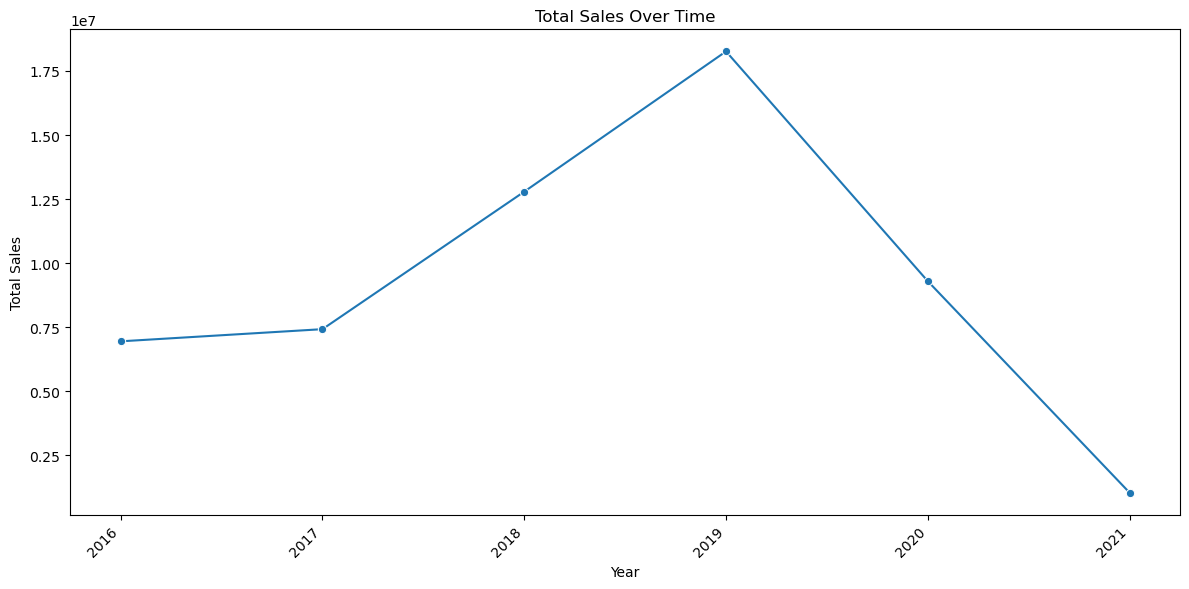

+--------+---------------+
|   year |   total_sales |
|--------+---------------|
|   2016 |   6.94679e+06 |
|   2017 |   7.42142e+06 |
|   2018 |   1.2789e+07  |
|   2019 |   1.82644e+07 |
|   2020 |   9.29463e+06 |
|   2021 |   1.03929e+06 |
+--------+---------------+


In [309]:

df = pd.DataFrame(out, columns=[i[0] for i in my_cursor.description])

# Convert 'total_sales' column to numeric type (important for plotting)
df['total_sales'] = pd.to_numeric(df['total_sales'])

# Create the plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='total_sales', data=df, marker='o')  # Use lineplot for time series data
plt.title('Total Sales Over Time')
plt.xlabel('Year') # Changed x-axis label to 'Year'
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Print the table
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))

## 8.Top Performing Products by Quantity Sold

In [312]:
my_cursor.execute("""
    SELECT 
    `Product Name`,
    SUM(`Quantity`) AS total_quantity_sold,
    SUM(`Quantity` * `Unit Price USD`) AS total_revenue
FROM 
    data_spark
GROUP BY 
    `Product Name`
ORDER BY 
    total_quantity_sold DESC;

""")

out = my_cursor.fetchall()
from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))
mydb.commit()

+-------------------------------------------------------------------------------------+-----------------------+-----------------+
| Product Name                                                                        |   total_quantity_sold |   total_revenue |
|-------------------------------------------------------------------------------------+-----------------------+-----------------|
| WWI Desktop PC2.33 X2330 Black                                                      |                   550 |       505450    |
| WWI Desktop PC1.80 E1800 White                                                      |                   538 |       123686    |
| Adventure Works Desktop PC1.60 ED160 Black                                          |                   521 |       140644    |
| Adventure Works Desktop PC2.30 MD230 White                                          |                   521 |       312079    |
| Adventure Works Desktop PC1.80 ED180 Black                                          |   

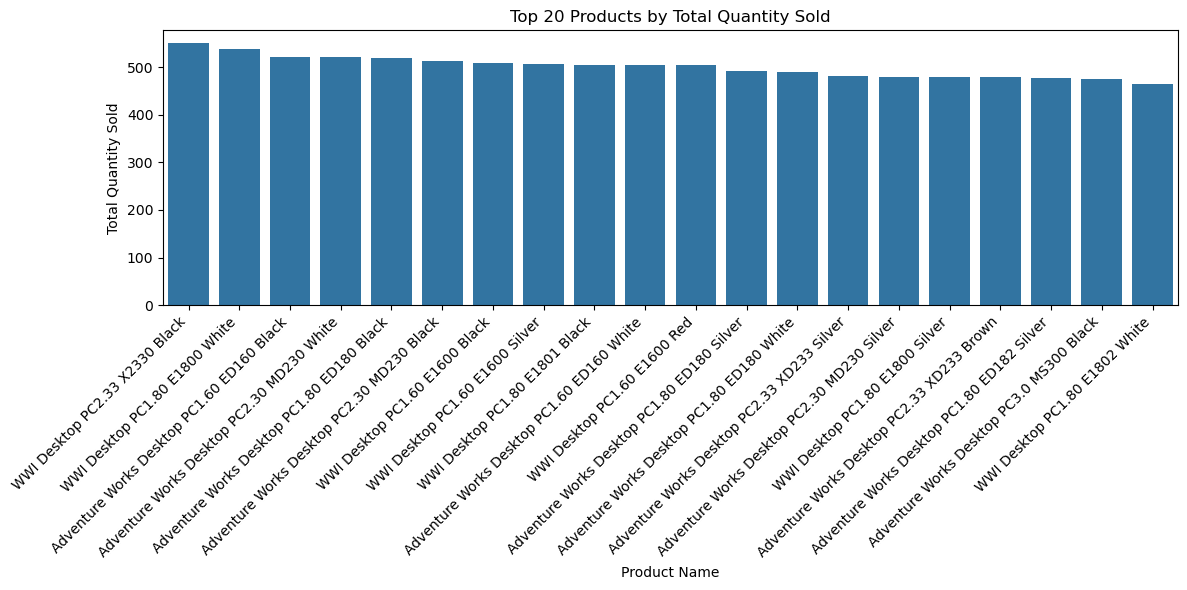

+-------------------------------------------------------------------------------------+-----------------------+-----------------+
| Product Name                                                                        |   total_quantity_sold |   total_revenue |
|-------------------------------------------------------------------------------------+-----------------------+-----------------|
| WWI Desktop PC2.33 X2330 Black                                                      |                   550 |       505450    |
| WWI Desktop PC1.80 E1800 White                                                      |                   538 |       123686    |
| Adventure Works Desktop PC1.60 ED160 Black                                          |                   521 |       140644    |
| Adventure Works Desktop PC2.30 MD230 White                                          |                   521 |       312079    |
| Adventure Works Desktop PC1.80 ED180 Black                                          |   

In [314]:
# Convert the query result to a DataFrame for easier manipulation
df = pd.DataFrame(out, columns=[i[0] for i in my_cursor.description])

# Assuming your DataFrame has columns 'Product Name', 'total_quantity_sold', and 'total_revenue'
# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Name', y='total_quantity_sold', data=df.head(20)) # Use head(20) to plot the top 20
plt.title('Top 20 Products by Total Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Print the table
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))

## 8.1 Product Popularity by Category

In [320]:
from tabulate import tabulate
my_cursor.execute("""
   SELECT 
    Category, 
    SUM(Quantity) AS total_quantity_sold
FROM 
    data_spark
GROUP BY 
    Category
ORDER BY 
    total_quantity_sold DESC;



""")

# Fetch the results
out = my_cursor.fetchall()

# Convert to DataFrame
df = pd.DataFrame(out, columns=[desc[0] for desc in my_cursor.description])

# Save to CSV
df.to_csv("Product_Popularity_by_Category.csv", index=False)

# Display the results in tabular format
print(tabulate(df, headers="keys", tablefmt="psql"))

# Commit if necessary (only if the query modifies data)
mydb.commit()

+----+-------------------------------+-----------------------+
|    | Category                      |   total_quantity_sold |
|----+-------------------------------+-----------------------|
|  0 | Computers                     |                 44151 |
|  1 | Cell phones                   |                 31477 |
|  2 | Music, Movies and Audio Books |                 28802 |
|  3 | Audio                         |                 23490 |
|  4 | Games and Toys                |                 22591 |
|  5 | Home Appliances               |                 18401 |
|  6 | Cameras and camcorders        |                 17609 |
|  7 | TV and Video                  |                 11236 |
+----+-------------------------------+-----------------------+


## 9.Geographical analysis by sales

In [323]:
my_cursor.execute("""
   SELECT 
    `Continent`,
    SUM(`Quantity` * `Unit Price USD`) AS total_sales
FROM 
    data_spark
GROUP BY 
    `Continent`
ORDER BY 
    total_sales DESC;

""")

out = my_cursor.fetchall()
from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))
mydb.commit()

+---------------+---------------+
| Continent     |   total_sales |
|---------------+---------------|
| North America |   3.4596e+07  |
| Europe        |   1.84514e+07 |
| Australia     |   2.70814e+06 |
+---------------+---------------+


In [325]:
my_cursor.execute("""
   SELECT 
    `Country`,
    SUM(`Quantity` * `Unit Price USD`) AS total_sales
FROM 
    data_spark
GROUP BY 
    `Country`
ORDER BY 
    total_sales DESC;

""")

out = my_cursor.fetchall()
from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))
mydb.commit()


+----------------+---------------+
| Country        |   total_sales |
|----------------+---------------|
| United States  |   2.98716e+07 |
| United Kingdom |   7.08409e+06 |
| Germany        |   5.41415e+06 |
| Canada         |   4.72433e+06 |
| Australia      |   2.70814e+06 |
| Italy          |   2.47565e+06 |
| Netherlands    |   1.96215e+06 |
| France         |   1.51534e+06 |
+----------------+---------------+


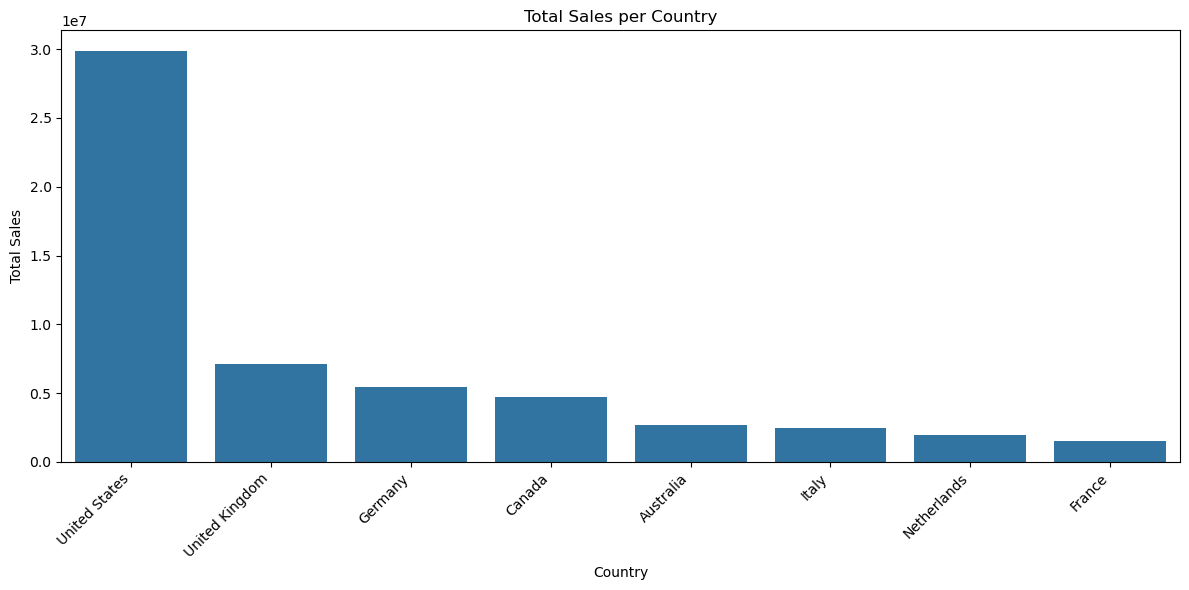

+----------------+---------------+
| Country        |   total_sales |
|----------------+---------------|
| United States  |   2.98716e+07 |
| United Kingdom |   7.08409e+06 |
| Germany        |   5.41415e+06 |
| Canada         |   4.72433e+06 |
| Australia      |   2.70814e+06 |
| Italy          |   2.47565e+06 |
| Netherlands    |   1.96215e+06 |
| France         |   1.51534e+06 |
+----------------+---------------+


In [327]:
df = pd.DataFrame(out, columns=[i[0] for i in my_cursor.description])

# Convert the 'total_sales' column to numeric if it's not already
df['total_sales'] = pd.to_numeric(df['total_sales'])

# Create the plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='total_sales', data=df)
plt.title('Total Sales per Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the table (optional)
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))

## 10.Profitability Analysis by Product

In [330]:
my_cursor.execute("""
   SELECT 
    `Product Name`,
    (SUM(`Unit Price USD`) - SUM(`Unit Cost USD`)) AS profit_margin
FROM 
    data_spark
GROUP BY 
    `Product Name`
HAVING 
    profit_margin > 0
ORDER BY 
    profit_margin DESC;

""")

out = my_cursor.fetchall()
from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))
mydb.commit()

+-------------------------------------------------------------------------------------+-----------------+
| Product Name                                                                        |   profit_margin |
|-------------------------------------------------------------------------------------+-----------------|
| Adventure Works Desktop PC2.33 XD233 Black                                          |        97840.5  |
| WWI Desktop PC2.33 X2330 Black                                                      |        94636.1  |
| Adventure Works Desktop PC2.33 XD233 Silver                                         |        94600.7  |
| Adventure Works Desktop PC2.33 XD233 Brown                                          |        93304.8  |
| WWI Desktop PC2.33 X2330 Brown                                                      |        92792.5  |
| Adventure Works Desktop PC2.33 XD233 White                                          |        92008.9  |
| WWI Desktop PC2.33 X2330 Silver             

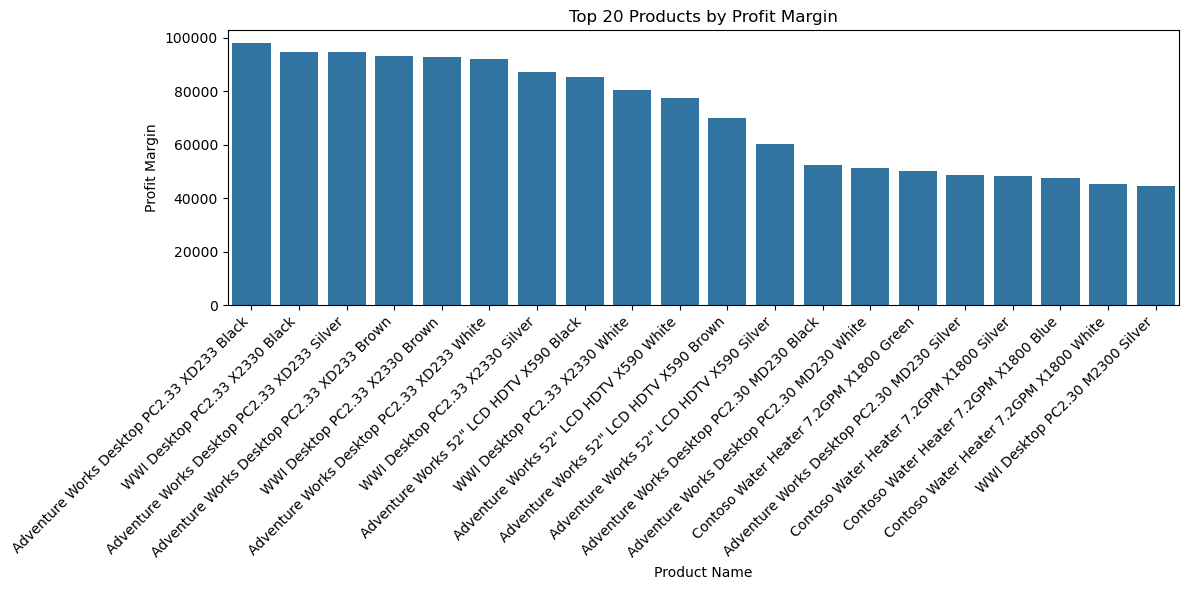

+-------------------------------------------------------------------------------------+-----------------+
| Product Name                                                                        |   profit_margin |
|-------------------------------------------------------------------------------------+-----------------|
| Adventure Works Desktop PC2.33 XD233 Black                                          |        97840.5  |
| WWI Desktop PC2.33 X2330 Black                                                      |        94636.1  |
| Adventure Works Desktop PC2.33 XD233 Silver                                         |        94600.7  |
| Adventure Works Desktop PC2.33 XD233 Brown                                          |        93304.8  |
| WWI Desktop PC2.33 X2330 Brown                                                      |        92792.5  |
| Adventure Works Desktop PC2.33 XD233 White                                          |        92008.9  |
| WWI Desktop PC2.33 X2330 Silver             

In [332]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

df = pd.DataFrame(out, columns=[i[0] for i in my_cursor.description])

# Assuming your DataFrame has columns 'Product Name' and 'profit_margin'
# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Name', y='profit_margin', data=df.head(20)) # Use head(20) to plot the top 20
plt.title('Top 20 Products by Profit Margin')
plt.xlabel('Product Name')
plt.ylabel('Profit Margin')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Print the table
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))

## 11.Online Store Performance

In [335]:
my_cursor.execute("""
   SELECT 
    'Square Metres' AS Store,
    SUM(`Quantity` * `Unit Price USD`) AS total_sales,
    COUNT(DISTINCT `Order Number`) AS total_orders
FROM 
    data_spark
WHERE 
    `StoreKey` = 0;

""")

out = my_cursor.fetchall()
from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))
mydb.commit()

+---------------+---------------+----------------+
| Store         |   total_sales |   total_orders |
|---------------+---------------+----------------|
| Square Metres |   1.14043e+07 |           5580 |
+---------------+---------------+----------------+


In [337]:
my_cursor.execute("""
   SELECT 
    `Country`,
    COUNT(*) AS online_order_count
FROM 
    data_spark
WHERE 
    `Delivery Date` = 'Online'
GROUP BY 
    `Country`
ORDER BY 
    online_order_count DESC;


""")

out = my_cursor.fetchall()
from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))
mydb.commit()

+----------------+----------------------+
| Country        |   online_order_count |
|----------------+----------------------|
| United States  |                 7212 |
| United Kingdom |                 1497 |
| Germany        |                 1294 |
| Canada         |                 1209 |
| Australia      |                  693 |
| Italy          |                  484 |
| Netherlands    |                  433 |
| France         |                  343 |
+----------------+----------------------+


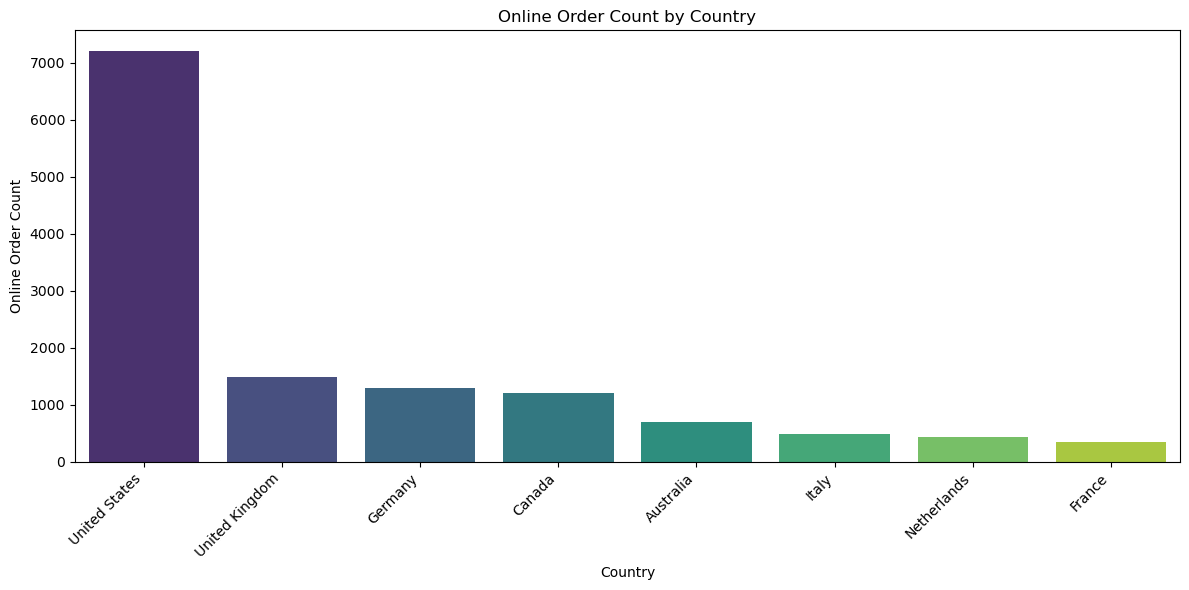

+----------------+----------------------+
| Country        |   online_order_count |
|----------------+----------------------|
| United States  |                 7212 |
| United Kingdom |                 1497 |
| Germany        |                 1294 |
| Canada         |                 1209 |
| Australia      |                  693 |
| Italy          |                  484 |
| Netherlands    |                  433 |
| France         |                  343 |
+----------------+----------------------+


In [339]:
df = pd.DataFrame(out, columns=[i[0] for i in my_cursor.description])

# Create the plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='online_order_count', data=df, palette='viridis')  # Use a colorful palette
plt.title('Online Order Count by Country')
plt.xlabel('Country')
plt.ylabel('Online Order Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Print the table with colorful formatting using tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))

## 12, In-Store performance

In [342]:
my_cursor.execute("""
   SELECT 
    `Country`,
    COUNT(*) AS In_Store_order_count
FROM 
    data_spark
WHERE 
    `Delivery Date` = 'In_Store'
GROUP BY 
    `Country`
ORDER BY 
    In_Store_order_count DESC;


""")

out= my_cursor.fetchall()
from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))
mydb.commit()

+----------------+------------------------+
| Country        |   In_Store_order_count |
|----------------+------------------------|
| United States  |                  26555 |
| United Kingdom |                   6643 |
| Germany        |                   4662 |
| Canada         |                   4206 |
| Australia      |                   2248 |
| Italy          |                   2201 |
| Netherlands    |                   1817 |
| France         |                   1387 |
+----------------+------------------------+


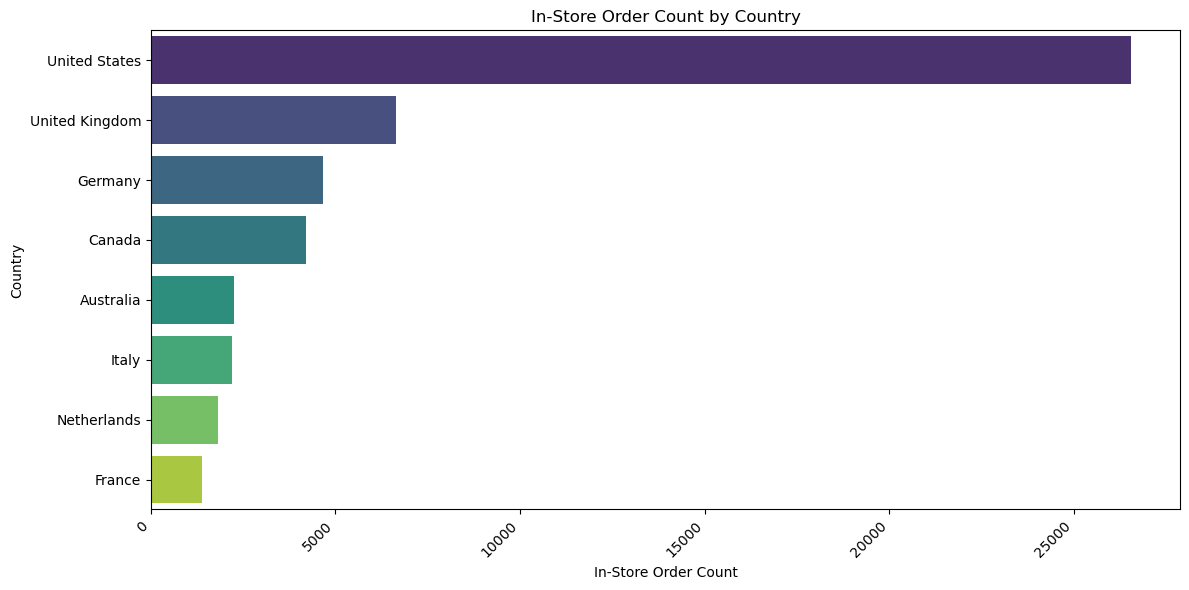

+----------------+------------------------+
| Country        |   In_Store_order_count |
|----------------+------------------------|
| United States  |                  26555 |
| United Kingdom |                   6643 |
| Germany        |                   4662 |
| Canada         |                   4206 |
| Australia      |                   2248 |
| Italy          |                   2201 |
| Netherlands    |                   1817 |
| France         |                   1387 |
+----------------+------------------------+


In [344]:
df = pd.DataFrame(out, columns=[i[0] for i in my_cursor.description])

# Rename the column for better visualization
df = df.rename(columns={'COUNT(*)': 'In_Store_order_count'})


# Create the plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='In_Store_order_count', y='Country', data=df, palette='viridis')  # Use a colorful palette
plt.title('In-Store Order Count by Country')
plt.xlabel('In-Store Order Count')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Print the table with colorful formatting using tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))

In [346]:
def compare_online_instore_visual(online_data, instore_data):
    """
    Compares online and in-store order counts visually using a bar plot.

    Args:
        online_data (list of tuples): Result of the online order query.
        instore_data (list of tuples): Result of the in-store order query.
    """

    # Convert query results to pandas DataFrames
    df_online = pd.DataFrame(online_data, columns=['Country', 'online_order_count'])
    df_instore = pd.DataFrame(instore_data, columns=['Country', 'In_Store_order_count'])

    # Merge DataFrames on 'Country'
    df_merged = pd.merge(df_online, df_instore, on='Country', how='outer')
    df_merged.fillna(0, inplace=True) # Fill any NaN with 0 for countries with only one order type

    # Set 'Country' as index for plotting
    df_merged.set_index("Country", inplace = True)

    # Create the bar plot
    df_merged.plot(kind='bar', figsize=(12,6))
    plt.title('Online vs. In-Store Order Counts by Country')
    plt.xlabel('Country')
    plt.ylabel('Order Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


    # Print tables for both online and in-store orders
    print("Online Orders:")
    print(tabulate(online_data, headers=['Country', 'online_order_count'], tablefmt='psql'))

    print("\nIn-Store Orders:")
    print(tabulate(instore_data, headers=['Country', 'In_Store_order_count'], tablefmt='psql'))

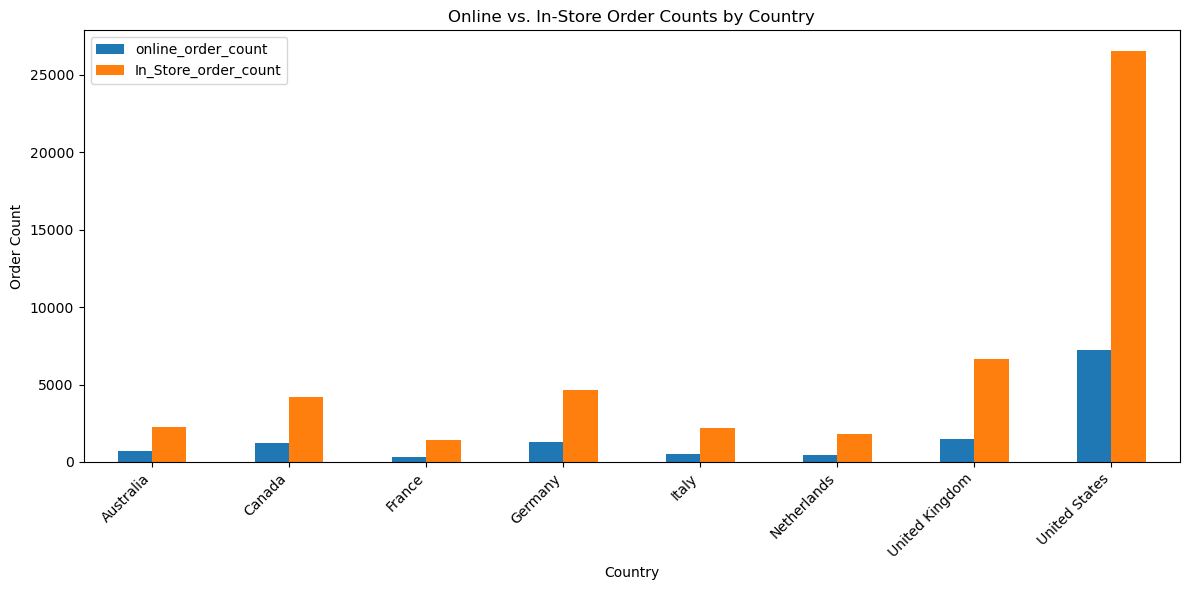

Online Orders:
+----------------+----------------------+
| Country        |   online_order_count |
|----------------+----------------------|
| United States  |                 7212 |
| United Kingdom |                 1497 |
| Germany        |                 1294 |
| Canada         |                 1209 |
| Australia      |                  693 |
| Italy          |                  484 |
| Netherlands    |                  433 |
| France         |                  343 |
+----------------+----------------------+

In-Store Orders:
+----------------+------------------------+
| Country        |   In_Store_order_count |
|----------------+------------------------|
| United States  |                  26555 |
| United Kingdom |                   6643 |
| Germany        |                   4662 |
| Canada         |                   4206 |
| Australia      |                   2248 |
| Italy          |                   2201 |
| Netherlands    |                   1817 |
| France         |     

In [348]:
# Execute the query for online orders
my_cursor.execute("""
    SELECT 
        `Country`,
        COUNT(*) AS online_order_count
    FROM 
        data_spark
    WHERE 
        `Delivery Date` = 'Online'
    GROUP BY 
        `Country`
    ORDER BY 
        online_order_count DESC;
""")
online_data = my_cursor.fetchall()  # Fetch the results

# Execute the query for in-store orders
my_cursor.execute("""
    SELECT 
        `Country`,
        COUNT(*) AS In_Store_order_count
    FROM 
        data_spark
    WHERE 
        `Delivery Date` = 'In_Store'
    GROUP BY 
        `Country`
    ORDER BY 
        In_Store_order_count DESC;
""")
instore_data = my_cursor.fetchall()  # Fetch the results

# Call the visualization function with the fetched data
compare_online_instore_visual(online_data, instore_data)

In [352]:
# Exchange_rates table creation
my_cursor.execute('''CREATE TABLE IF NOT EXISTS Exchange_rate(
                  Date DATE,
                  Currency_Code VARCHAR(255),
                  Exchange FLOAT
                  )''')
print("Table Created successfully")

# insert values into Exchange_rates table
insert_query ='''INSERT INTO Exchange_rate(
                  Date,
                  Currency_Code,
                  Exchange)
                  VALUES (%s, %s, %s)'''
data=Exchange_rate.values.tolist()
batch_size = 1000  # Adjust this value as needed

for i in range(0, len(data), batch_size):
    batch_data = data[i:i + batch_size]
    try:
        # Performing batch insert with executemany()
        my_cursor.executemany(insert_query, batch_data)
        mydb.commit()
    except mysql.connector.Error as err:
        if err.errno == mysql.connector.errorcode.CR_SERVER_LOST or err.errno == mysql.connector.errorcode.CR_SERVER_GONE_ERROR:
            reconnect()
            my_cursor.executemany(insert_query, batch_data)
            mydb.commit()
print("Inserted successfully")
mydb.commit()

Table Created successfully
Inserted successfully


In [386]:
my_cursor.execute("""
   SELECT 
    Data_Spark.`Currency Code`,
    SUM(Data_Spark.`Quantity` * Data_Spark.`Unit Price USD`) AS total_sales,
    AVG(Exchange_rate.`Exchange`) AS average_exchange_rate
FROM 
    Data_Spark
JOIN 
    Exchange_rate
ON 
    Data_Spark.`Order Date` = Exchange_rate.`Date`
GROUP BY 
    Data_Spark.`Currency Code`
ORDER BY 
    total_sales DESC;


""")

out= my_cursor.fetchall()
from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))
mydb.commit()

+-----------------+---------------+-------------------------+
| Currency Code   |   total_sales |   average_exchange_rate |
|-----------------+---------------+-------------------------|
| USD             |   1.49358e+08 |                 1.07409 |
| EUR             |   5.68364e+07 |                 1.07339 |
| GBP             |   3.54204e+07 |                 1.07139 |
| CAD             |   2.36217e+07 |                 1.07199 |
| AUD             |   1.35407e+07 |                 1.073   |
+-----------------+---------------+-------------------------+


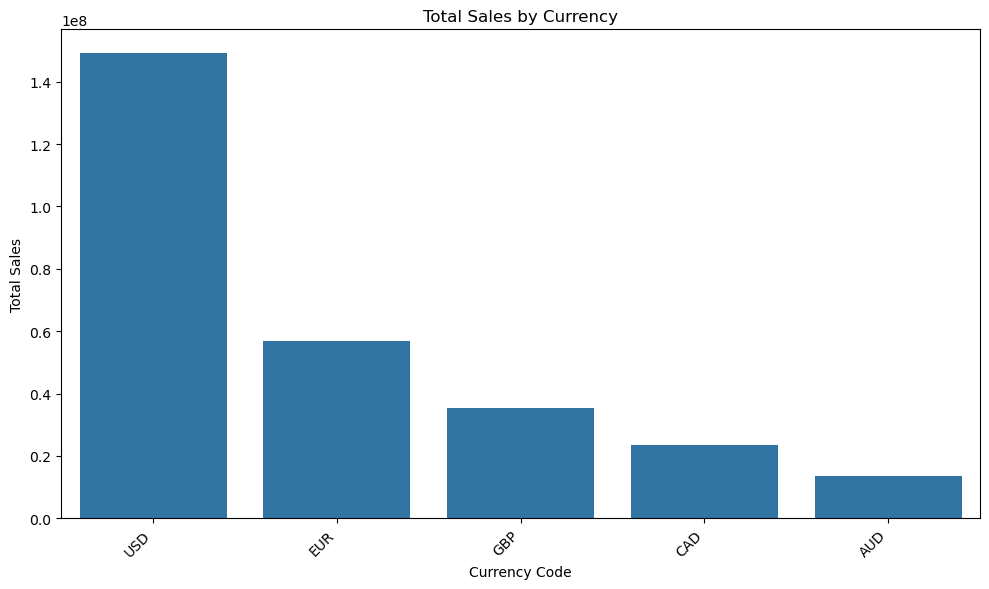

+-----------------+---------------+-------------------------+
| Currency Code   |   total_sales |   average_exchange_rate |
|-----------------+---------------+-------------------------|
| USD             |   1.49358e+08 |                 1.07409 |
| EUR             |   5.68364e+07 |                 1.07339 |
| GBP             |   3.54204e+07 |                 1.07139 |
| CAD             |   2.36217e+07 |                 1.07199 |
| AUD             |   1.35407e+07 |                 1.073   |
+-----------------+---------------+-------------------------+


In [388]:
 #Convert the query result to a DataFrame
df = pd.DataFrame(out, columns=['Currency Code', 'total_sales', 'average_exchange_rate'])

# Convert 'total_sales' to numeric type
df['total_sales'] = pd.to_numeric(df['total_sales'])

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Currency Code', y='total_sales', data=df)
plt.title('Total Sales by Currency')
plt.xlabel('Currency Code')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))

## 13. Overall count of customers

In [393]:
my_cursor.execute("""
   SELECT COUNT(DISTINCT CustomerKey) AS customer_count 
FROM Data_Spark;

""")

out= my_cursor.fetchall()
from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))
mydb.commit()

+------------------+
|   customer_count |
|------------------|
|            11887 |
+------------------+


## 14. Count of stores by country

In [396]:
my_cursor.execute("""
   SELECT Country, COUNT(StoreKey) 
FROM Data_Spark
GROUP BY Country 
ORDER BY COUNT(StoreKey) DESC;
""")

out= my_cursor.fetchall()
from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))
mydb.commit()

+----------------+-------------------+
| Country        |   COUNT(StoreKey) |
|----------------+-------------------|
| United States  |             33767 |
| United Kingdom |              8140 |
| Germany        |              5956 |
| Canada         |              5415 |
| Australia      |              2941 |
| Italy          |              2685 |
| Netherlands    |              2250 |
| France         |              1730 |
+----------------+-------------------+


## 15.Overall selling amount

In [399]:
my_cursor.execute("""
  SELECT SUM(`Unit Price USD` * Quantity) AS total_sales_amount 
FROM Data_Spark
""")

out= my_cursor.fetchall()
from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))
mydb.commit()

+----------------------+
|   total_sales_amount |
|----------------------|
|          5.57555e+07 |
+----------------------+


## 16. Brand count

In [402]:
my_cursor.execute("""
    SELECT Brand, COUNT(Brand) AS brand_count 
    FROM Data_Spark
    GROUP BY Brand;
""")

out = my_cursor.fetchall()

from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))

+----------------------+---------------+
| Brand                |   brand_count |
|----------------------+---------------|
| A. Datum             |          1834 |
| Adventure Works      |          6382 |
| Contoso              |         15953 |
| Fabrikam             |          3560 |
| Litware              |          1663 |
| Northwind Traders    |          2411 |
| Proseware            |          2995 |
| Southridge Video     |          7887 |
| Tailspin Toys        |          5457 |
| The Phone Company    |          6062 |
| Wide World Importers |          8680 |
+----------------------+---------------+


## 17. CP and SP difference and profit

In [405]:
my_cursor.execute("""
    SELECT `Unit price USD`, `Unit Cost USD`, 
       ROUND((`Unit price USD` - `Unit Cost USD`), 2) AS diff,
       ROUND(((`Unit price USD` - `Unit Cost USD`) / `Unit Cost USD`) * 100, 2) AS profit_percent
FROM Data_Spark LIMIT 50;

""")

out = my_cursor.fetchall()

from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))

+------------------+-----------------+--------+------------------+
|   Unit price USD |   Unit Cost USD |   diff |   profit_percent |
|------------------+-----------------+--------+------------------|
|           296    |           98.07 | 197.93 |           201.83 |
|           349    |          160.49 | 188.51 |           117.46 |
|           158    |           72.66 |  85.34 |           117.45 |
|           646    |          214.03 | 431.97 |           201.83 |
|           269.95 |          137.63 | 132.32 |            96.14 |
|            37.95 |           17.45 |  20.5  |           117.48 |
|           149    |           68.52 |  80.48 |           117.45 |
|           129    |           59.32 |  69.68 |           117.46 |
|             6.99 |            3.56 |   3.43 |            96.35 |
|            43    |           21.92 |  21.08 |            96.17 |
|           427    |          141.47 | 285.53 |           201.83 |
|           119    |           54.72 |  64.28 |           117.

## 18. Brand-wise selling amount

In [408]:
my_cursor.execute("""
    SELECT Brand, ROUND(SUM(`Unit price USD` * Quantity), 2) AS sales_amount
FROM Data_Spark 
GROUP BY Brand;
""")

out = my_cursor.fetchall()

from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))

+----------------------+------------------+
| Brand                |     sales_amount |
|----------------------+------------------|
| A. Datum             |      1.48621e+06 |
| Adventure Works      |      1.18499e+07 |
| Contoso              |      1.07923e+07 |
| Fabrikam             |      6.80789e+06 |
| Litware              |      2.6595e+06  |
| Northwind Traders    |      1.12607e+06 |
| Proseware            |      3.21263e+06 |
| Southridge Video     |      2.5786e+06  |
| Tailspin Toys        | 682731           |
| The Phone Company    |      5.38682e+06 |
| Wide World Importers |      9.1728e+06  |
+----------------------+------------------+


## 19. Subcategory-wise selling amount

In [411]:
my_cursor.execute("""
    SELECT Subcategory, COUNT(Subcategory) 
FROM Data_Spark 
GROUP BY Subcategory;

""")

out = my_cursor.fetchall()

from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))

+----------------------------------+----------------------+
| Subcategory                      |   COUNT(Subcategory) |
|----------------------------------+----------------------|
| Air Conditioners                 |                  312 |
| Bluetooth Headphones             |                 4327 |
| Boxed Games                      |                 3455 |
| Camcorders                       |                 1403 |
| Cameras & Camcorders Accessories |                 1423 |
| Car Video                        |                  433 |
| Cell phones Accessories          |                 1713 |
| Coffee Machines                  |                  724 |
| Computers Accessories            |                 1526 |
| Desktops                         |                 6447 |
| Digital Cameras                  |                 1396 |
| Digital SLR Cameras              |                 1337 |
| Download Games                   |                 3606 |
| Fans                             |    

## 20.Subcategory-wise total sales

In [414]:
my_cursor.execute("""
    SELECT Subcategory, ROUND(SUM(`Unit price USD` * Quantity), 2) AS TOTAL_SALES_AMOUNT
FROM Data_Spark
GROUP BY Subcategory 
ORDER BY TOTAL_SALES_AMOUNT DESC;


""")

out = my_cursor.fetchall()

from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))

+----------------------------------+----------------------+
| Subcategory                      |   TOTAL_SALES_AMOUNT |
|----------------------------------+----------------------|
| Desktops                         |          9.90636e+06 |
| Televisions                      |          4.30872e+06 |
| Projectors & Screens             |          3.76752e+06 |
| Water Heaters                    |          3.54782e+06 |
| Camcorders                       |          3.35799e+06 |
| Laptops                          |          3.16478e+06 |
| Movie DVD                        |          3.13101e+06 |
| Touch Screen Phones              |          3.08346e+06 |
| Smart phones & PDAs              |          2.80566e+06 |
| Refrigerators                    |          2.15266e+06 |
| Washers & Dryers                 |          2.11985e+06 |
| Digital SLR Cameras              |          1.89464e+06 |
| Monitors                         |          1.51812e+06 |
| Bluetooth Headphones             |    

## 21. Country overall sales

In [417]:
my_cursor.execute("""
    SELECT Country, SUM(`Unit price USD` * Quantity) AS total_sales 
FROM Data_Spark
GROUP BY Country DESC;

""")

out = my_cursor.fetchall()

from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))

+----------------+---------------+
| Country        |   total_sales |
|----------------+---------------|
| United States  |   2.98716e+07 |
| United Kingdom |   7.08409e+06 |
| Netherlands    |   1.96215e+06 |
| Italy          |   2.47565e+06 |
| Germany        |   5.41415e+06 |
| France         |   1.51534e+06 |
| Canada         |   4.72433e+06 |
| Australia      |   2.70814e+06 |
+----------------+---------------+


## 22. Year-wise brand sales

In [420]:
my_cursor.execute("""
    SELECT YEAR(`Order Date`), Brand, 
       ROUND(SUM(`Unit price USD` * Quantity), 2) AS year_sales 
FROM Data_Spark
GROUP BY YEAR(`Order Date`) DESC,Brand;
""")

out = my_cursor.fetchall()

from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))

+----------------------+----------------------+------------------+
|   YEAR(`Order Date`) | Brand                |       year_sales |
|----------------------+----------------------+------------------|
|                 2021 | A. Datum             |  23892.6         |
|                 2021 | Adventure Works      | 238738           |
|                 2021 | Contoso              | 163802           |
|                 2021 | Fabrikam             | 102449           |
|                 2021 | Litware              |  38281.7         |
|                 2021 | Northwind Traders    |   5349.3         |
|                 2021 | Proseware            |  78517.8         |
|                 2021 | Southridge Video     |  55783.7         |
|                 2021 | Tailspin Toys        |  14247.6         |
|                 2021 | The Phone Company    | 145283           |
|                 2021 | Wide World Importers | 172944           |
|                 2020 | A. Datum             | 259464        

## 23. Year-wise sales

In [423]:
my_cursor.execute("""
    SELECT YEAR(`Order Date`), SUM(`Unit price USD` * Quantity) AS sp_year 
FROM Data_Spark
GROUP BY YEAR(`Order Date`) ORDER BY sp_year DESC;

""")

out = my_cursor.fetchall()

from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))

+----------------------+-------------+
|   YEAR(`Order Date`) |     sp_year |
|----------------------+-------------|
|                 2019 | 1.82644e+07 |
|                 2018 | 1.2789e+07  |
|                 2020 | 9.29463e+06 |
|                 2017 | 7.42142e+06 |
|                 2016 | 6.94679e+06 |
|                 2021 | 1.03929e+06 |
+----------------------+-------------+


## 24. Year-wise profit
`Unit Cost USD`

In [429]:
my_cursor.execute("""
    SELECT YEAR(`Order Date`) AS Year,
       (SUM(`Unit Price USD` * Quantity) - SUM(`Unit Cost USD` * Quantity)) AS sales, 
       LAG(SUM(`Unit Price USD` * Quantity) - SUM(`Unit Cost USD` * Quantity)) 
       OVER (ORDER BY YEAR(`Order Date`)) AS Previous_year_Sales,
       ROUND(((SUM(`Unit Price USD` * Quantity) - SUM(`Unit Cost USD` * Quantity)) -
       LAG(SUM(`Unit Price USD` * Quantity) - SUM(`Unit Cost USD` * Quantity)) 
       OVER (ORDER BY YEAR(`Order Date`))) / LAG(SUM(`Unit Price USD` * Quantity) - SUM(`Unit Cost USD` * Quantity)) 
       OVER (ORDER BY YEAR(`Order Date`)) * 100, 2) AS profit_percent
FROM Data_Spark
GROUP BY YEAR(`Order Date`) DESC;

""")

out = my_cursor.fetchall()

from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))

+--------+------------------+-----------------------+------------------+
|   Year |            sales |   Previous_year_Sales |   profit_percent |
|--------+------------------+-----------------------+------------------|
|   2021 | 608464           |           5.44746e+06 |           -88.83 |
|   2020 |      5.44746e+06 |           1.06977e+07 |           -49.08 |
|   2019 |      1.06977e+07 |           7.46496e+06 |            43.31 |
|   2018 |      7.46496e+06 |           4.33706e+06 |            72.12 |
|   2017 |      4.33706e+06 |           4.107e+06   |             5.6  |
|   2016 |      4.107e+06   |                       |                  |
+--------+------------------+-----------------------+------------------+


## Overall female

In [432]:
my_cursor.execute("""
    SELECT COUNT(Gender) AS Female_count 
FROM Data_Spark
WHERE Gender = "Female";


""")

out = my_cursor.fetchall()

from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))

+----------------+
|   Female_count |
|----------------|
|          31080 |
+----------------+


## Overall male

In [435]:
my_cursor.execute("""
    SELECT COUNT(Gender) AS Male_count 
FROM Data_Spark
WHERE Gender = "Male";


""")

out = my_cursor.fetchall()

from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))

+--------------+
|   Male_count |
|--------------|
|        31804 |
+--------------+


## Overall Gender count

In [439]:
my_cursor.execute("""
    SELECT COUNT(Gender) AS Overall_count 
FROM Data_Spark;


""")

out = my_cursor.fetchall()

from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in my_cursor.description], tablefmt='psql'))

+-----------------+
|   Overall_count |
|-----------------|
|           62884 |
+-----------------+
